In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
irisData = datasets.load_iris()
print(irisData.data)
print(irisData.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [18]:
irisData.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

class_distribution is a function that is going to show the distribution of different classes in a target set

In [84]:
def class_distribution(target_set):
    elts, counts = np.unique(target_set, return_counts=True)
    print('The distribution of the different classes is : ')
    for elt,count in zip(elts,counts):
        print(irisData.target_names[elt],count)

In [85]:
class_distribution(irisData.target)

The distribution of the different classes is : 
setosa 50
versicolor 50
virginica 50


In [27]:
print('The different values of the 32th element :',irisData.data[31])
print("The 32th element's class :",irisData.target[31] , "===" , irisData.target_names[irisData.target[31]])

The different values of the 32th element : [5.4 3.4 1.5 0.4]
The 32th element's class : 0 === setosa


plot_2D creates a 2D scatter plot to visualize a dataset with multiple classes by working on its first and second
features distribution.

In [32]:
from itertools import cycle
import pylab as pl


def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')  # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
        pl.legend()
    pl.show()

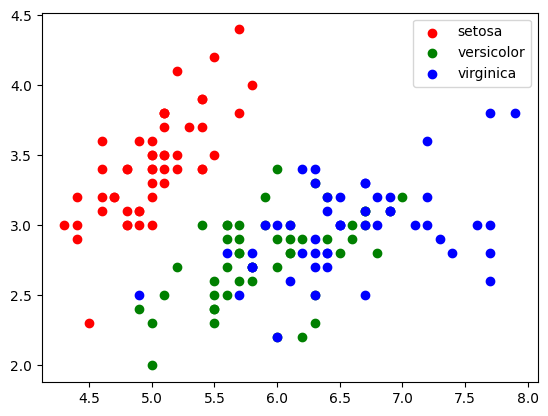

In [33]:
plot_2D(irisData.data, irisData.target, irisData.target_names)

This is the predefined function of plot_2D that we can find in matplotlib.pyplot

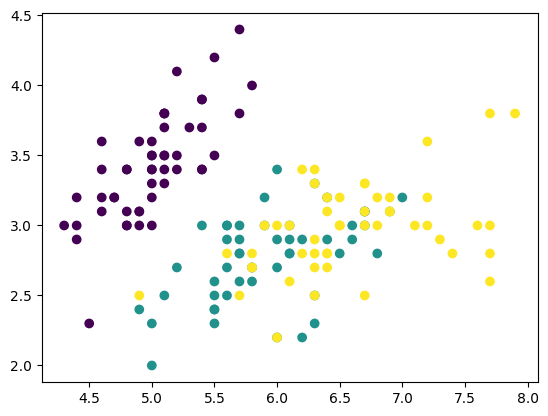

In [6]:
plt.scatter(irisData.data[:, 0], irisData.data[:, 1], c=irisData.target, )

By working on the third and fourth features , we can have a better separation between our classes

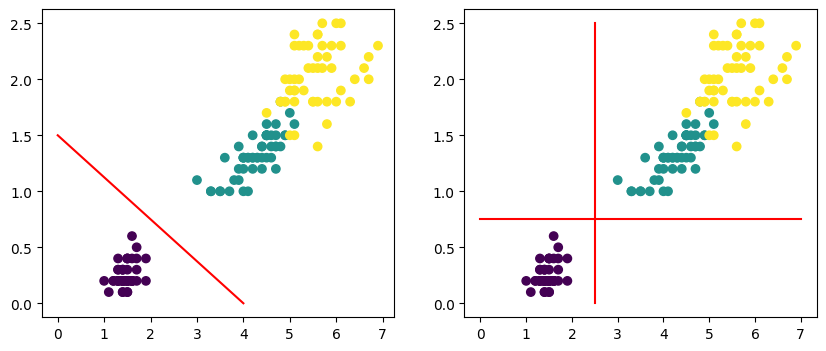

In [44]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(irisData.data[:, 2], irisData.data[:, 3], c=irisData.target )
plt.plot([0, 4], [1.5, 0], c="r")
plt.subplot(1,2,2)
plt.scatter(irisData.data[:, 2], irisData.data[:, 3], c=irisData.target )
plt.plot([2.5, 2.5], [0, 2.5], c="r")
plt.plot([0, 7], [0.75, 0.75], c="r")
plt.show()

In [69]:
from sklearn import naive_bayes

np.random.seed(0)
nb = naive_bayes.MultinomialNB(fit_prior=True)
irisData = datasets.load_iris()
nb.fit(irisData.data[:-1], irisData.target[:-1]) #we didn't include the last element in the training set because we
                                                 #are going to test with it
p31 = nb.predict(irisData.data[[31]])
print(p31)
plast = nb.predict(irisData.data[[-1]])
print(plast)
p = nb.predict(irisData.data)
print(nb.score(irisData.data, irisData.target))

[0]
[2]
0.9666666666666667


The score is equal to 0 . In this case , that's the expected result since we did train our model only on 2 classes ,
and then we tested it on instances from a totally different class that he has never seen before.

In [58]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
nb.score(irisData.data[100:], irisData.target[100:])

0.0

Three different methods to get the error rate

In [59]:
ea = 0
for i in range(len(irisData.data)):
    if p[i] != irisData.target[i]:
        ea = ea+1
print("The number of false predictions is :",ea)
print("The error rate is :",ea/len(irisData.data))

The number of false predictions is : 5
The error rate is : 0.03333333333333333


In [67]:
ea = irisData.target - p
ea = ea[ea != 0]
print("The number of false predictions is :",len(ea))
print("The error rate is :",len(ea)/len(irisData.data))

The number of false predictions is : 5
The error rate is : 0.03333333333333333


In [70]:
print("The error rate is :",1 - nb.score(irisData.data,irisData.target))

The error rate is : 0.033333333333333326


Recreating the train_test_split function with test_size = 1/3 and shuffle = True

In [74]:
def split(S):
    data = S.data
    target = S.target
    true_values = np.ones((100, 1), dtype=bool)
    false_values = np.zeros((50, 1), dtype=bool)
    mask_values = np.vstack((true_values, false_values))
    np.random.shuffle(mask_values)
    mask_values.reshape(150, 1)
    return data[mask_values[:,0] == True], data[mask_values[:,0] == False], target[mask_values[:,0] == True], target[mask_values[:,0] == False]

In [89]:
train_x, test_x, train_y, test_y = split(irisData)
print('In train_y')
class_distribution(train_y)
print('-'*50)
print('In test_y')
class_distribution(test_y)

In train_y
The distribution of the different classes is : 
setosa 33
versicolor 33
virginica 34
--------------------------------------------------
In test_y
The distribution of the different classes is : 
setosa 17
versicolor 17
virginica 16


In [13]:
def test(S , model):
    train_x, test_x, train_y, test_y = split(S)
    model.fit(train_x,train_y)
    return model.score(test_x,test_y)
print("New prediction : ",test(irisData,nb))

New prediction :  0.94


C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == "__main__":
C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if __name__ == "__main__":
C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is dep

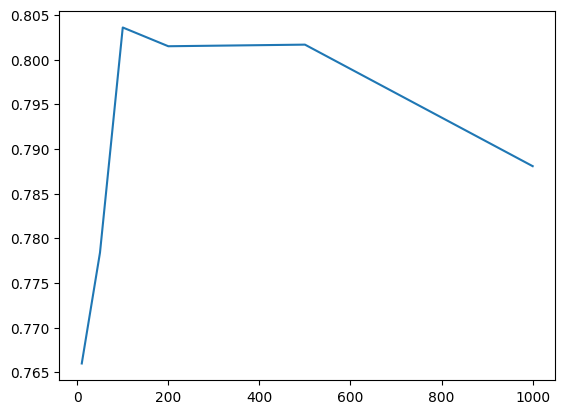

In [14]:
looping_list = [10,50,100,200,500,1000]
averages = []
for elt in looping_list:
    score = 0
    for i in range(elt):
        score += test(irisData,nb)
    averages.append(score/elt)
plt.plot(looping_list,averages)

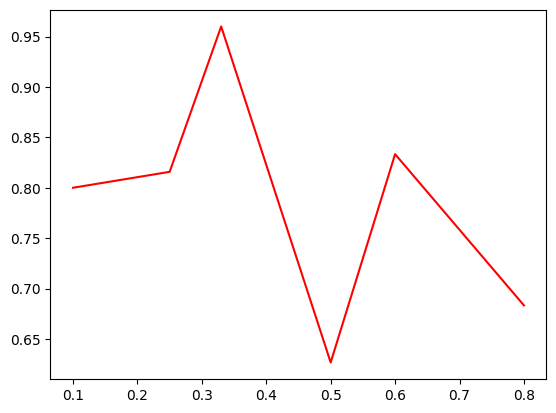

In [15]:
testing_list = [0.1,0.25,0.33,0.5,0.6,0.8]
values = []
for test in testing_list:
    x_train, x_test, y_train, y_test = train_test_split(irisData.data,irisData.target,test_size=test)
    nb.fit(x_train,y_train)
    values.append(nb.score(x_test,y_test))
plt.plot(testing_list,values,c="r")

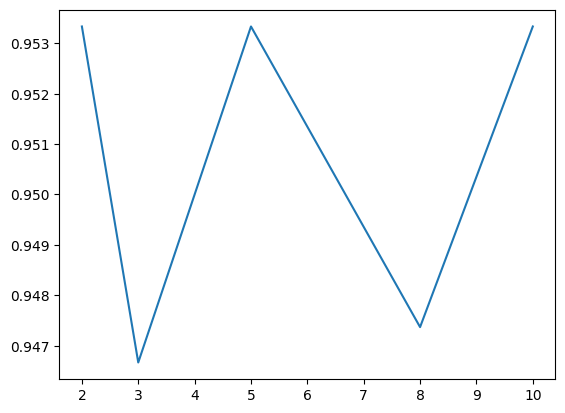

In [16]:
splits_nbr = [2,3,5,8,10]
values = []
for split in splits_nbr:
    values.append(cross_val_score(nb , irisData.data , irisData.target , cv = split).mean())
plt.plot(splits_nbr , values)